# Analisis Faktor yang Mempengaruhi Strategi Penetapan Harga Uber dan Lyft di Boston, MA

# Project Overview

 [Uber and Lyft Dataset Boston, MA](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma) adalah dataset yang disediakan. Kita dapat menggunakan dataset ini untuk menganalisis faktor-faktor yang mempengaruhi persaingan antara Uber dan Lyft di wilayah Boston, Massachusetts. Kedua perusahaan ini menawarkan layanan yang sama, yaitu transportasi online, namun mereka bersaing untuk pangsa pasar melalui aspek-aspek seperti harga, kualitas layanan, ketersediaan, dan variabel lainnya. Oleh karena itu, analisis data ini bertujuan untuk mengidentifikasi dan mengevaluasi faktor-faktor yang mempengaruhi strategi penetapan harga.

Dalam analisis data ini, metode regresi linear digunakan karena sesuai dengan tujuan kita untuk mengidentifikasi faktor-faktor yang mempengaruhi penetapan harga dengan memodelkan beberapa variabel dependen dan menentukan model yang paling sesuai.

## Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import mean_absolute_percentage_error
from pickle import dump,load

## Data Loading

In [2]:
# input dataset
df = pd.read_csv("./rideshare_kaggle.csv")

# memunculkan dataset
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Melihat ukuran dataset
df.shape

(693071, 57)

In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
# Menampilkan data yang memiliki nilai null (NaN)
df.isnull().sum()[df.isnull().sum()>0]

price    55095
dtype: int64

Berdasarkan hasil diatas, terdapat missing values hanya pada Target price sebanyak 55095. Maka dari itu, harus dibersihkan 

## Data Cleaning

In [6]:
# Remove NaN pada price
df = df.dropna(subset=['price']).reset_index()

In [7]:
# Dicek kembali apakah masih terdapat nilai null pada dataframenya
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
# Menghapus beberapa atribut yang bersifat unik dan atribut timezone karena hanya ada satu jenis
df = df.drop(['index','id','timestamp','hour','day','month','datetime', 'product_id', 'timezone'], axis=1)

## Correlation Check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   source                       637976 non-null  object 
 1   destination                  637976 non-null  object 
 2   cab_type                     637976 non-null  object 
 3   name                         637976 non-null  object 
 4   price                        637976 non-null  float64
 5   distance                     637976 non-null  float64
 6   surge_multiplier             637976 non-null  float64
 7   latitude                     637976 non-null  float64
 8   longitude                    637976 non-null  float64
 9   temperature                  637976 non-null  float64
 10  apparentTemperature          637976 non-null  float64
 11  short_summary                637976 non-null  object 
 12  long_summary                 637976 non-null  object 
 13 

In [10]:
# Mendefinisikan variabel dengan tipe int
check_cols = df[['price',  'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
                 'windGustTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
                 'apparentTemperatureMinTime', 'temperatureLowTime', 'apparentTemperatureMaxTime','windBearing','temperatureHighTime']]

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


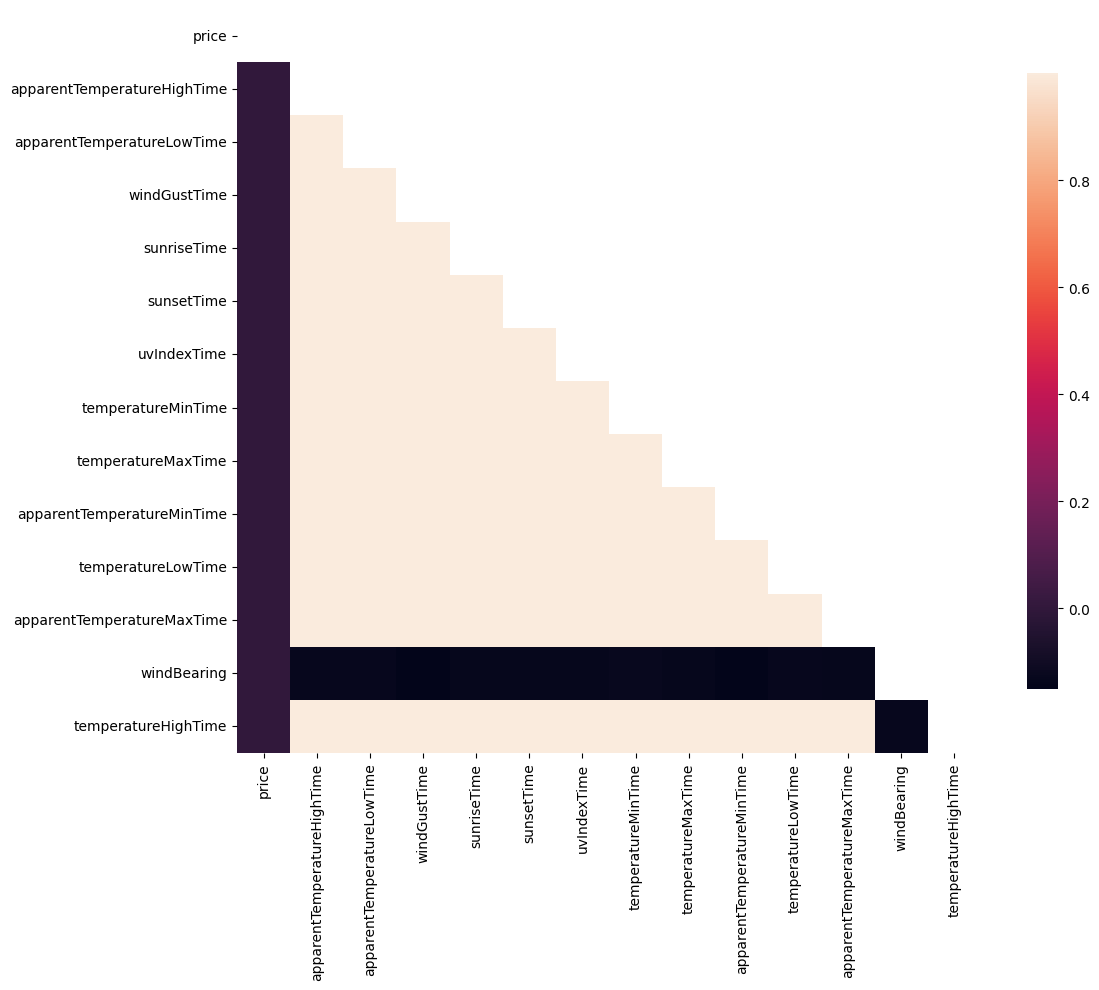

In [11]:
# Create correlation matrix
corr_matrix = check_cols.corr()

# Create a mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",  # Format for the annotations
            mask=mask,  # To hide the upper triangle
            cbar_kws={"shrink": 0.8},  # To adjust the colorbar size
            square=True)  # To make the cells square

plt.show()

Berdasarkan heatmap diatas, didapat variabel tersebut berwarna gelap yang artinya berkorelasi lemah atau tidak ada korelasi dengan harga. Maka lebih baik dibersihkan.

In [12]:
df = df.drop(['apparentTemperatureHighTime', 'apparentTemperatureLowTime',
                 'windGustTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
                 'apparentTemperatureMinTime', 'temperatureLowTime', 'apparentTemperatureMaxTime','windBearing','temperatureHighTime'], axis=1)

In [13]:
df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [14]:
# Membuat variabel dengan tipe float
float_cols = df.select_dtypes(include=['float']).columns

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


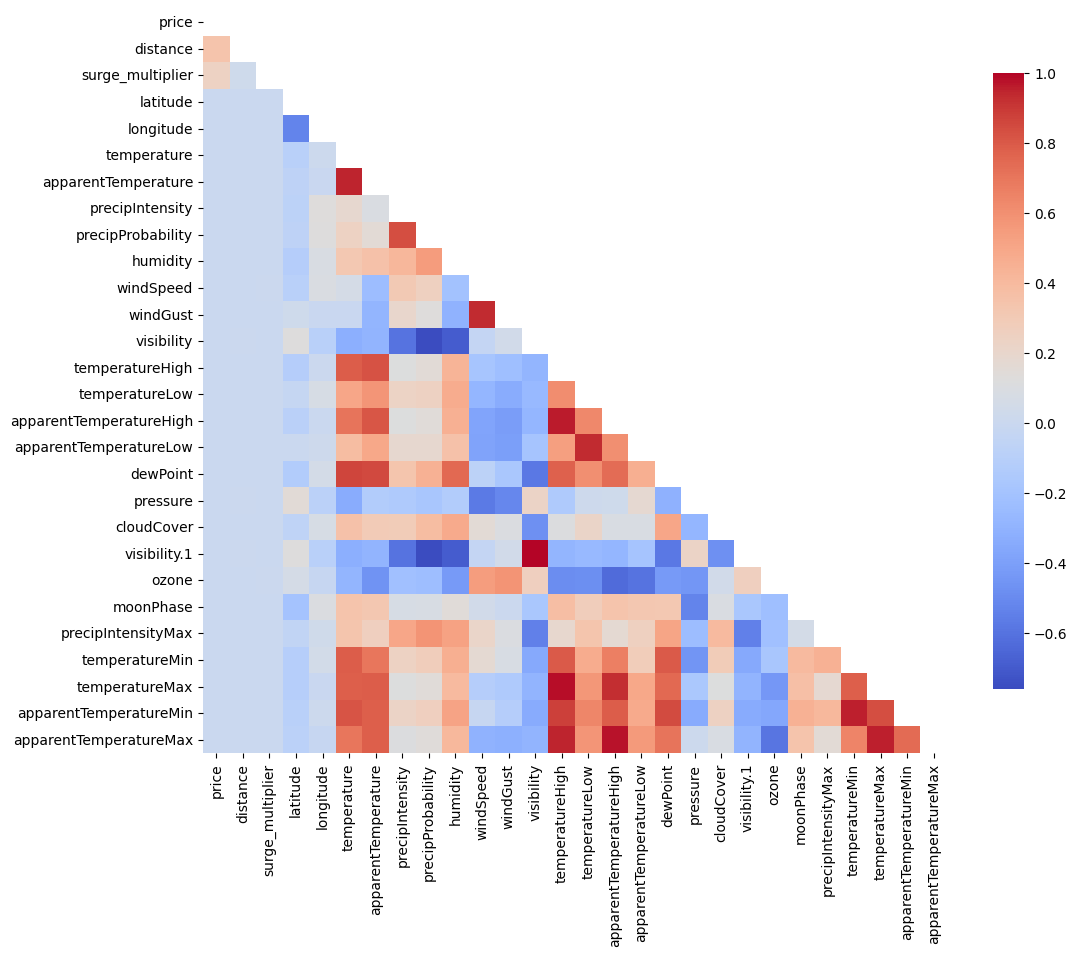

In [15]:
# Membuat matriks korelasi
corr_matrix = df[float_cols.tolist()].corr()

# Create a mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",  # Format for the annotations
            cmap="coolwarm",  # Colormap
            mask=mask,  # To hide the upper triangle
            cbar_kws={"shrink": 0.8},  # To adjust the colorbar size
            square=True)  # To make the cells square

plt.show()

Berdasarkan heatmap diatas, variabel yang memiliki warna terang itu bernilai 0 maka dari itu variabel diatas dapat dihapus karena korelasi yang terbentuk lemah atau tidak ada korelasi dengan harga. Maka dari itu lebih baik dihapus saja.

In [16]:
df = df.drop(['latitude','longitude','temperature','apparentTemperature','precipIntensity',
'precipProbability','humidity','windSpeed','windGust','visibility','temperatureHigh',
'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','dewPoint','pressure','cloudCover',
'visibility.1','ozone','moonPhase','precipIntensityMax','temperatureMin','temperatureMax','apparentTemperatureMin',
'apparentTemperatureMax'],axis=1)

In [17]:
df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,long_summary,icon,uvIndex
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,"Rain until morning, starting again in the eve...",rain,0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,Light rain in the morning.,clear-night,0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,Partly cloudy throughout the day.,clear-night,0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            637976 non-null  object 
 1   destination       637976 non-null  object 
 2   cab_type          637976 non-null  object 
 3   name              637976 non-null  object 
 4   price             637976 non-null  float64
 5   distance          637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
 7   short_summary     637976 non-null  object 
 8   long_summary      637976 non-null  object 
 9   icon              637976 non-null  object 
 10  uvIndex           637976 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 53.5+ MB


c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


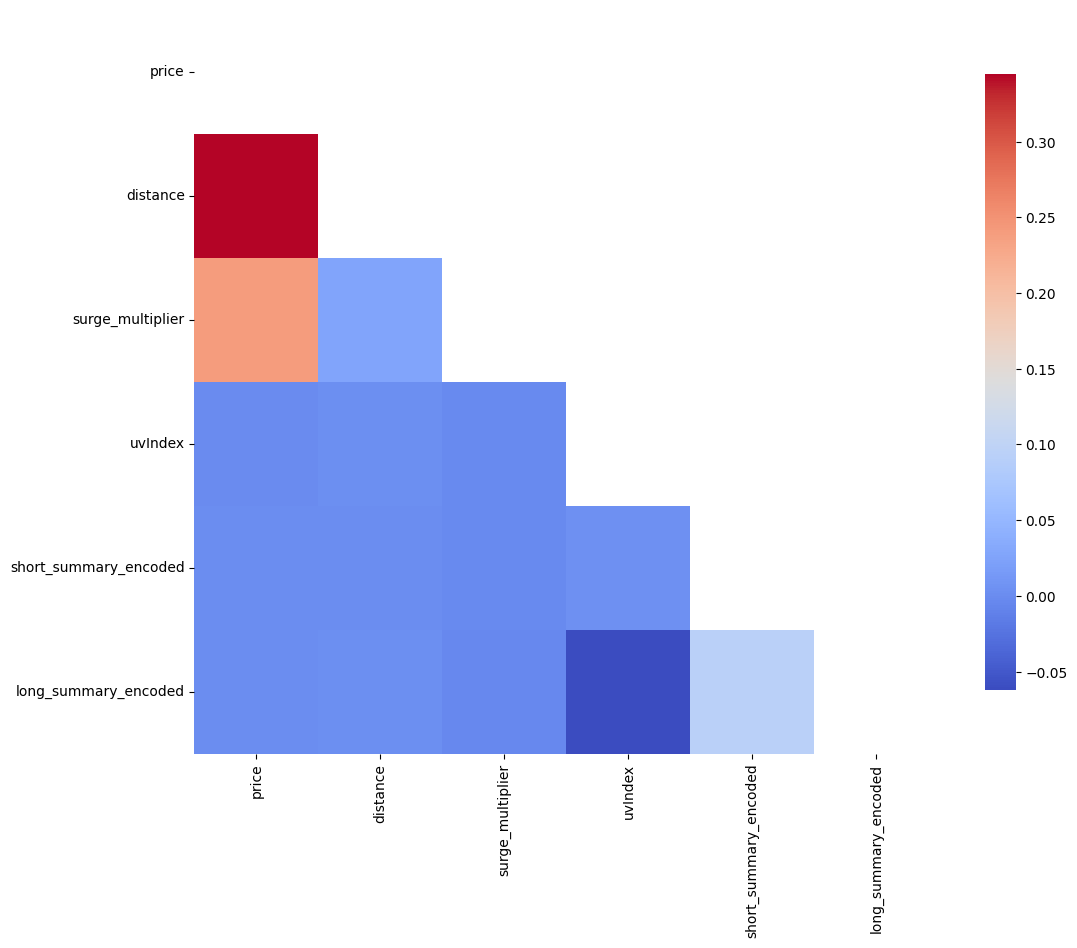

In [19]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengonversi kolom 'short_summary' ke numerik
label_encoder = LabelEncoder()
df['short_summary_encoded'] = label_encoder.fit_transform(df['short_summary'])
df['long_summary_encoded'] = label_encoder.fit_transform(df['long_summary'])

# Pilih kolom-kolom yang ingin dihitung korelasinya terhadap 'price'
last_cols = ['price', 'distance', 'surge_multiplier', 'uvIndex', 'short_summary_encoded','long_summary_encoded']

## Membuat matriks korelasi
corr_matrix = df[last_cols].corr()

# Create a mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",  # Format for the annotations
            cmap="coolwarm",  # Colormap
            mask=mask,  # To hide the upper triangle
            cbar_kws={"shrink": 0.8},  # To adjust the colorbar size
            square=True)  # To make the cells square

plt.show()

Berdasarkan heatmap diatas, didapat bawah variabel uvIndex dan short_summary memiliki korelasi lemah atau tidak ada korelasi. Maka dari itu, variabel tersebut lebih baik dihapus agar didapat dataset dengan atribut yang memiliki korelasi terhadap harga

In [20]:
df = df.drop(['uvIndex','short_summary_encoded','short_summary','long_summary_encoded','long_summary'],axis=1)
df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,icon
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,clear-night
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,clear-night
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,partly-cloudy-night


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            637976 non-null  object 
 1   destination       637976 non-null  object 
 2   cab_type          637976 non-null  object 
 3   name              637976 non-null  object 
 4   price             637976 non-null  float64
 5   distance          637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
 7   icon              637976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 38.9+ MB


## Exploratory Data Analysis

In [22]:
# Get a list of columns in the dataset
dataset_columns = df.columns

# Loop through each column
for column in dataset_columns:
    # Display unique values in the column, sorted
    unique_values = df[column].sort_values().unique()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")

Column: source
['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']


Column: destination
['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']


Column: cab_type
['Lyft' 'Uber']


Column: name
['Black' 'Black SUV' 'Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL'
 'Shared' 'UberPool' 'UberX' 'UberXL' 'WAV']


Column: price
[ 2.5   3.    3.5   4.5   5.    5.5   6.    6.5   7.    7.5   7.98  8.
  8.35  8.5   9.    9.35  9.5  10.   10.5  10.6  11.   11.5  11.6  12.
 12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.
 18.35 18.5  19.   19.35 19.5  20.   20.5  21.   21.5  22.   22.5  23.
 23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.35 28.5
 29.   29.5  30.   30.5  31. 

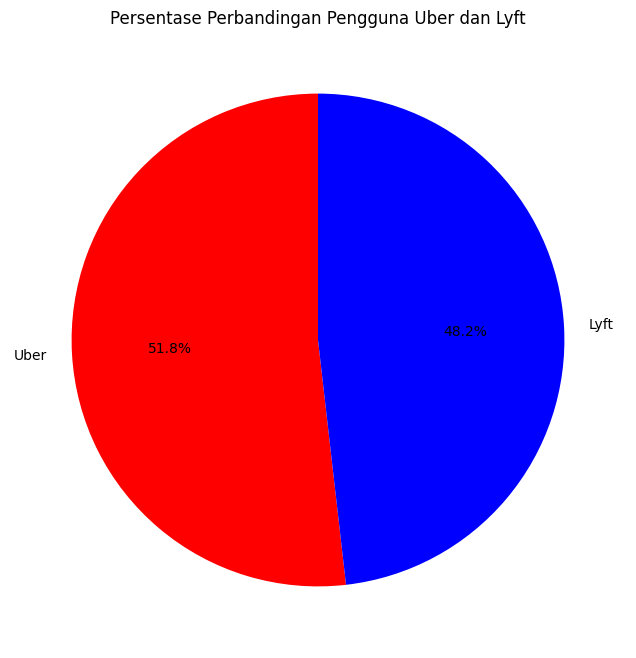

In [23]:
# Menghitung jumlah pengguna Uber dan Lyft
df_counts = df['cab_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Persentase Perbandingan Pengguna Uber dan Lyft')
plt.show()

## Results

Dari grafik pie yang dihasilkan, kita dapat menyimpulkan seberapa besar persentase pemesanan yang datang dari masing-masing perusahaan Uber dan Lyft. Dengan demikian, analisis ini dapat memberikan wawasan bagi bisnis untuk memahami preferensi pelanggan terkait perusahaan taksi online Uber dan Lyft di wilayah tersebut. Berdasarkan grafik pie di atas, dapat disimpulkan bahwa **presentase Uber 3,6% lebih banyak dipesan dibandingkan dengan Lyft**

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

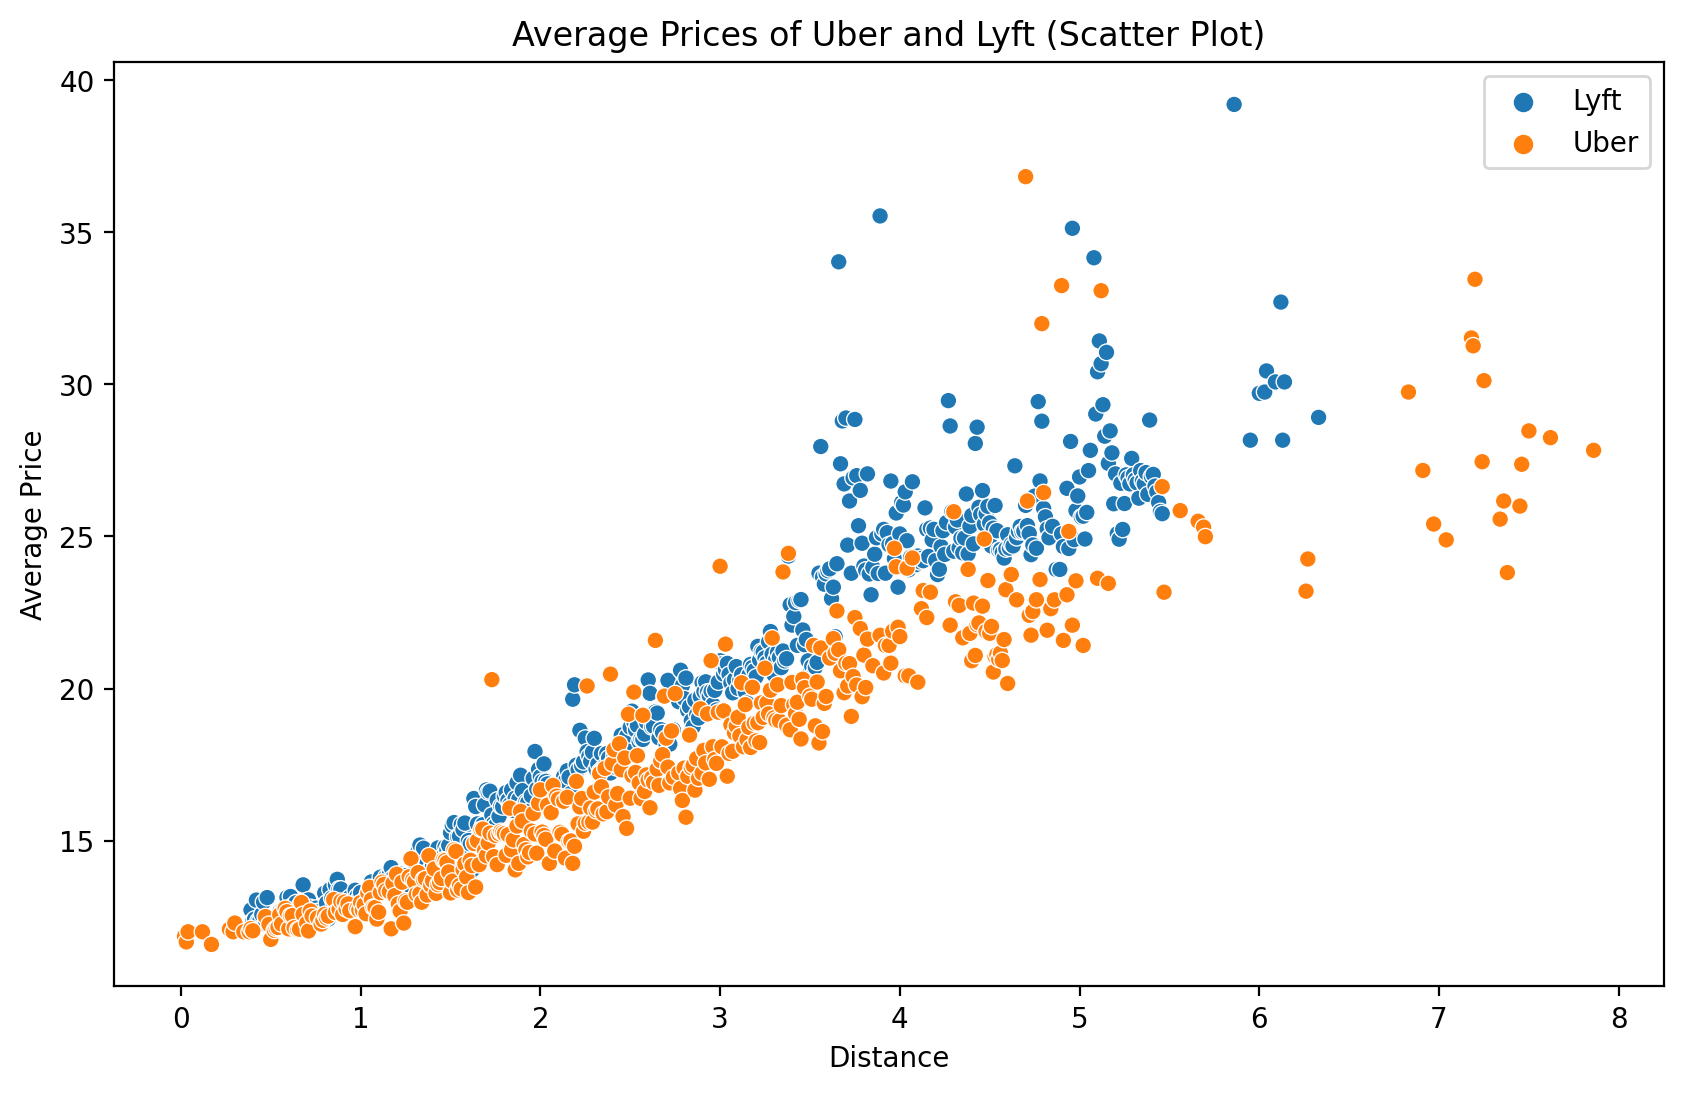

In [24]:
# Menghitung nilai rata-rata untuk setiap kombinasi 'cab_type' dan 'distance'
uber_lyft_average_prices = df.groupby(['cab_type', 'distance'])['price'].mean().reset_index()

# Menampilkan scatter plot nilai rata-rata
plt.figure(figsize=(10, 6), dpi=200)
sns.scatterplot(data=uber_lyft_average_prices, x='distance', y='price', hue='cab_type')
plt.title('Average Prices of Uber and Lyft (Scatter Plot)')
plt.xlabel('Distance')
plt.ylabel('Average Price')
plt.legend()
plt.show()

#### Kesimpulan

Berdasarkan scatter plot diatas, dapat terlihat bahwa:
- Untuk kedua layanan Uber dan Lyft, terlihat bahwa terdapat kenaikan harga ('price') seiring dengan peningkatan jarak perjalanan ('distance'). Ini dapat diindikasikan bahwa harga dan jarak memiliki tren positif pada kedua kelompok data.
- Dalam kategori jarak tertentu, terlihat bahwa harga rata-rata untuk Lyft mungkin lebih tinggi atau lebih rendah daripada Uber. Hal ini terlihat dari sejauh mana kedua garis tren tersebut bersinggungan atau terpisah di beberapa titik.
- Seiring dengan peningkatan jarak, terlihat adanya variasi harga yang mungkin disebabkan oleh faktor-faktor lain selain jarak, seperti cuaca, rute perjalanan, dan beberapa faktor-faktor yang dapat mempengaruhi.

In [25]:
# Membuat variabel Uber karena ingin menganalisis lebih lanjut
uber = df[df['cab_type']=='Uber']

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


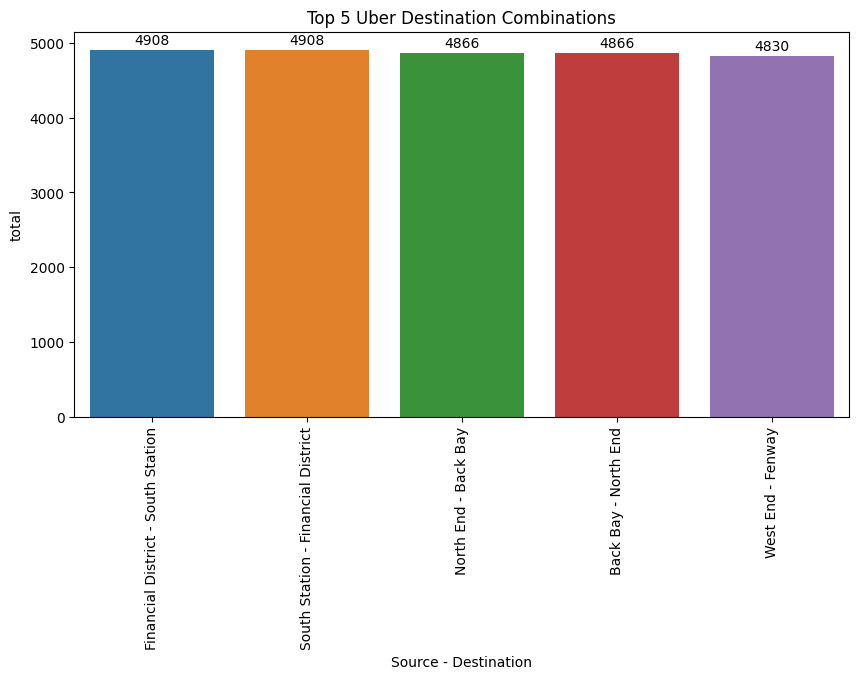

In [26]:
# Melihat 5 tertinggi source dan destinasi pada pengguna Uber 
uber_top5 = uber.groupby(['source', 'destination']).size().reset_index()
uber_top5.columns = ['source', 'destination','total']
uber_top5 = uber_top5.sort_values(by='total', ascending=False).head(5)

# Combine source and destination into one column
uber_top5['Source - Destination'] = uber_top5['source'] + ' - ' + uber_top5['destination']
uber_top5 = uber_top5[['Source - Destination', 'total']]

# Create a bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=uber_top5, x='Source - Destination', y='total')
plt.title("Top 5 Uber Destination Combinations")
plt.xticks(rotation=90)

# Display the counts above each bar
for i in ax.patches:
    ax.annotate(format(i.get_height(), '0.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()

#### Kesimpulan

Berdasarkan bar plot diatas, dapat terlihat bahwa pengguna Uber paling banyak memesan untuk perjalanan dari `Financial District ke South Station ataupun sebaliknya`. 

In [27]:
# Membuat function
def analyze_direction(source, destination):
    selected_trips = uber[(uber['source'] == source) & (uber['destination'] == destination)]
    
    # Analisis jenis Uber yang sering dipesan
    popular_uber_types = selected_trips['name'].value_counts().reset_index()
    popular_uber_types.columns = ['Uber Type', 'Total Trips']

    # Bar Plot dengan palet warna 'pastel'
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Uber Type', y='Total Trips', data=popular_uber_types, palette='pastel')
    plt.title(f'Jenis Uber yang sering dipesan dari {source} ke {destination}')
    plt.show()

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


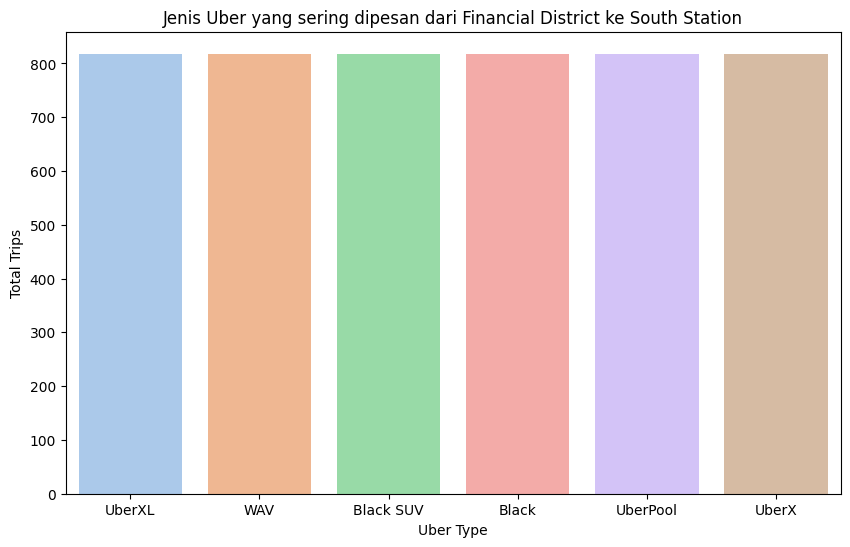

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


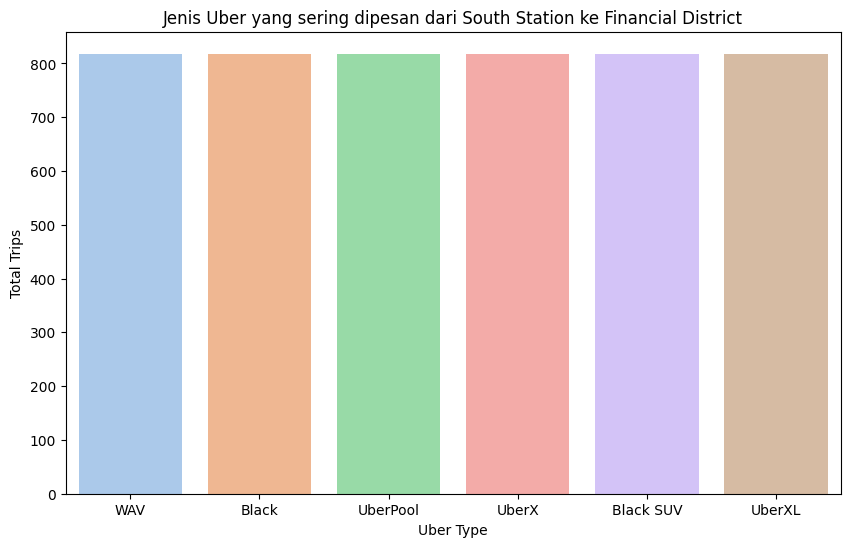

In [28]:
 # Analisis perjalanan dari Financial District ke South Station
analyze_direction('Financial District', 'South Station')

# Analisis perjalanan dari South Station ke Financial District
analyze_direction('South Station', 'Financial District')

#### Kesimpulan

Berdasarkan bar plot diatas, **jenis Uber semuanya rata dipesan tidak ada yang lebih sering dipesan** untuk perjalanan dari Financial District ke South Station dan sebaliknya

In [29]:
# Membuat function untuk mengetahui Uber mana yang memiliki harga paling murah
def find_cheapest_uber(source, destination):
    selected_trips = uber[(uber['source'] == source) & (uber['destination'] == destination)]

    # Temukan jenis Uber dengan harga paling murah
    cheapest_uber_type = selected_trips.loc[selected_trips['price'].idxmin(), 'name']
    
    print(f"Jenis Uber dengan harga paling murah dari {source} ke {destination}: {cheapest_uber_type}")
    print(f"Harga: {selected_trips['price'].min()}")

In [30]:
# Temukan jenis Uber dengan harga paling murah dari Financial District ke South Station
find_cheapest_uber('Financial District', 'South Station')

# Temukan jenis Uber dengan harga paling murah dari South Station ke Financial District
find_cheapest_uber('South Station', 'Financial District')

Jenis Uber dengan harga paling murah dari Financial District ke South Station: UberPool
Harga: 5.5
Jenis Uber dengan harga paling murah dari South Station ke Financial District: UberPool
Harga: 4.5


#### Kesimpulan

Dikarenakan pada analisis sebelumnya memberikan informasi bahwa semua jenis Uber memiliki jumlah pesanan yang sama. Maka, kita lihat jenis Uber mana yang memiliki harga lebih terjangkau. Berdasarkan analisis diatas didapat bahwa:
* `Jika berangkat dari Financial District ke South Station bisa menggunakan UberPool dengan harga 5.5`
* `Jika berangkat dari South Station ke Financial District bisa menggunakan UberPool dengan harga 4.5`

# **Data Preprocessing**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            637976 non-null  object 
 1   destination       637976 non-null  object 
 2   cab_type          637976 non-null  object 
 3   name              637976 non-null  object 
 4   price             637976 non-null  float64
 5   distance          637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
 7   icon              637976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 38.9+ MB


In [32]:
df.isnull().sum()

source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
icon                0
dtype: int64

In [33]:
# Mendefinisikan variabel X dan y
X = df.drop(columns=['price'])
y = df['price']

In [34]:
# Membuat data training dan testing dengan 30% sebagai data testing dan 70% sebagai data training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [35]:
# Mengambil kolom yang masih berupa object dan kategori
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing data
onehot = TargetEncoder(random_state=0,)
categorical_transformer = Pipeline(steps=[('onehot', onehot)])

#column transformer to pandas 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)],
        verbose_feature_names_out=False, #hanya menampilkan hasil transformasi saja
        remainder='passthrough').set_output(transform="pandas") #kolom non kategorikal tetap ada, dan outputnya dipastikan pandas

X_train_prep = preprocessor.fit_transform(X_train,y_train)

In [36]:
X_test_prep = preprocessor.transform(X_test)

In [37]:
X_train_prep

,source,destination,cab_type,name,icon,distance,surge_multiplier
240787,18.839440,16.229203,17.343684,9.613088,16.513819,2.70,1.25
546200,16.099542,14.230945,15.777349,9.766483,16.465241,0.72,1.00
552444,18.120187,14.231617,17.343684,6.035317,16.550423,1.00,1.00
449408,16.586179,15.020818,17.354836,15.288135,16.539790,1.72,1.00
299557,16.373521,17.891131,15.777349,15.662507,16.582943,3.30,1.00
...,...,...,...,...,...,...,...
558088,16.063201,18.846974,17.340675,9.595254,16.384966,2.88,1.00
124605,15.624291,18.093772,17.338672,15.277126,16.485760,2.41,1.00
544751,18.148678,18.887465,17.354836,15.288135,16.505466,5.41,1.00
18638,16.070419,15.006570,15.758982,15.679381,16.516311,0.98,1.00


In [38]:
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
637971     9.5
637972    13.0
637973     9.5
637974    27.0
637975    10.0
Name: price, Length: 637976, dtype: float64

# **Create Model and Train It**

In [39]:
# Membuat model sekaligus melatih
model_train = sm.OLS(y_train,X_train_prep).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          3.553e+06
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        18:15:06   Log-Likelihood:                     -1.0464e+06
No. Observations:              446583   AIC:                                  2.093e+06
Df Residuals:                  446576   BIC:                                  2.093e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
source              -0.0745      0.003    -25.090      0.000      -0.080      -0.069
destination         -0.0066      0.003     -2.103      0.035      -0.013      -0.000
cab_type            -0.3481      0.005    -71.667      0.000      -0.358      -0.339
name                 0.9909      0.000   2143.032      0.000       0.990       0.992
icon                -1.0598      0.007   -158.224      0.000      -1.073      -1.047
distance             2.8395      0.004    661.768      0.000       2.831       2.848
surge_multiplier    18.2740      0.040    453.755      0.000      18.195      18.353
==============================================================================
Omnibus:                   177990.439   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3115306.344
Skew:                           1.467   Prob(JB):                         0.00
Kurtosis:                      15.602   Cond. No.                         398.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Lakukan prediksi terhadap data uji
y_pred = model_train.predict(X_test_prep)

# **Model Evaluation**

In [41]:
# Evaluasi model
mape = mean_absolute_percentage_error(y_test,y_pred) 

print("Mean Absolut Percentage Error:", mape)

Mean Absolut Percentage Error: 0.13511397328536107


In [42]:
# Save final model untuk diuji
models = [model_train]
names = ["Linear Regression"]
extension = "json"

for model,name in zip(models,names):
    with open(f"{name}.{extension}","wb") as files:
        dump(model,files)
    print(f"{name}.{extension} has been downloaded")

Linear Regression.json has been downloaded


# **Inferention**

In [43]:
# Contoh data uji
data_test = {
    'source': ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District'],
    'destination': ['South Station', 'North Station', 'Haymarket Square', 'Theatre District', 'West End'],
    'cab_type': ['Lyft', 'Uber', 'Lyft', 'Uber', 'Lyft'],
    'name': ['Black', 'Lux', 'Lyft', 'UberPool', 'Lyft XL'],
    'icon': ['clear-day', 'clear-night', 'cloudy', 'fog', 'partly-cloudy-day'],
    'distance': [0.02, 0.03, 0.04, 0.12, 0.17],
    'surge_multiplier': [1.0, 1.25, 1.5, 1.75, 2.0],
}

new_df = pd.DataFrame(data_test)

In [44]:
# Gunakan model untuk inferensi pada data baru
new_data_point = [[new_df]]

In [45]:
X = preprocessor.transform(new_df)

In [46]:
print(X)
print(y)

      source  destination   cab_type       name       icon  distance  \
0  16.045418    14.831507  17.345622  20.527775  16.528445      0.02   
1  15.642788    16.783785  15.767765  17.758957  16.528445      0.03   
2  18.837232    14.226567  17.345622   9.606693  16.528445      0.04   
3  18.385732    15.998227  15.767765   8.744519  16.528445      0.12   
4  18.141160    16.209497  17.345622  15.287750  16.528445      0.17   

   surge_multiplier  
0              1.00  
1              1.25  
2              1.50  
3              1.75  
4              2.00  
0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
637971     9.5
637972    13.0
637973     9.5
637974    27.0
637975    10.0
Name: price, Length: 637976, dtype: float64


In [47]:
new_df_pred = model_train.predict(X)
print(new_df_pred)

0    13.824193
1    16.244007
2    11.992490
3    16.505156
4    27.166746
dtype: float64


# **Conclusion**

1. Dataset yang digunakan dalam proyek ini adalah "Uber and Lyft Dataset Boston, MA" yang terdiri dari 693071 baris dan 57 kolom. Didalamnya berisi informasi perjalanan rideshare yang dilakukan di Boston, Massachusetts, Amerika Serikat. Dari begitu banyaknya fitur perlu diketahui fitur mana saja yang memiliki korelasi yang cukup, hal itu sangat berguna ketika dalam proses prediksi, dikarenakan `tujuan utama dalam projek ini adalah untuk memprediksi harga maka fitur price` merupakan variabel dependent yang akan menjadi predictand. Maka dari itu dilakukan analisis dengan menggunakan fungsi korelasi dan heatmap plot dari 57 fitur kami mengambil fitur **source, destination, cab_type, name, distance, surge multiplier, and icon** karena fitur-fitur tersebut memiliki korelasi yang cukup berpengaruh ke variabel dependent (**price**).

2. Hasil analisis Linier Regression, dengan tingkat kepercayaan 95% :
   * Berdasarkan hasil OLS Regression didapat nilai p-value pada tiap-tiap variabel lebih kecil dari 5% atau batas kesalahan error. Maka dari itu, dapat disimpulkan bahwa `variabel source, destination, cab_type, name, distance, surge multiplier dan icon berpengaruh secara signifikan terhadap harga`
   * `Nilai R-squared (R2) dari model Linear Regression adalah 0.9320078170032199 atau dibulatkan menjadi 0,928`
   * Rata-rata persentase kesalahan mutlak (MAPE) dari model Linear Regression adalah 0.12863463947628756 atau 0,13.

   R2 score merupakan salah satu metode yang digunakan untuk mengukur performa evaluasi pada regression. Hasil prediksi diatas dapat dilihat bahwa model prediksi menghasilkan nilai sebesar `0.928 atau 92,8% yang mana hasil tersebut menunjukkan nilai prediksi yang baik`.